<a href="https://colab.research.google.com/github/amanjaiswal777/ICCIT-Workshop/blob/main/01_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏡 House Price Prediction with Linear Regression
In this notebook, we'll build a simple machine learning model to predict house prices using synthetic data.

We will cover:
- Data generation
- Data exploration (EDA)
- Feature engineering
- Model training
- Predictions
- An assignment for you to practice 🎯

In [3]:

# 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


## 🔹 Step 1: Generate Synthetic Housing Data

In [4]:

# Generate reproducible synthetic dataset
np.random.seed(42)
n_samples = 500

house_size = np.random.normal(1500, 300, n_samples)  # in square feet
num_rooms = np.random.randint(2, 7, n_samples)
location_quality = np.random.choice([1, 2, 3], n_samples, p=[0.3, 0.5, 0.2])  # 1=low, 2=medium, 3=high

# Price = base + size * factor + rooms * factor + location premium + noise
base_price = 50000
price = (base_price +
         house_size * 120 +
         num_rooms * 10000 +
         location_quality * 20000 +
         np.random.normal(0, 20000, n_samples))

data = pd.DataFrame({
    "HouseSize": house_size,
    "NumRooms": num_rooms,
    "LocationQuality": location_quality,
    "Price": price
})

data.head()


,HouseSize,NumRooms,LocationQuality,Price
0,1649.014246,3,2,303513.564197
1,1458.520710,3,2,312920.972697
2,1694.306561,4,2,327417.793806
3,1956.908957,4,2,389783.916284
4,1429.753988,6,1,288100.666025


## 🔹 Step 2: Data Exploration

In [5]:

# Quick statistics
data.describe()


,HouseSize,NumRooms,LocationQuality,Price
count,500.000000,500.000000,500.000000,500.000000
mean,1502.051398,3.966000,1.908000,309738.421652
std,294.375974,1.422988,0.710313,45286.161824
min,527.619798,2.000000,1.000000,193618.023704
25%,1289.907779,3.000000,1.000000,280180.797665
50%,1503.839144,4.000000,2.000000,308685.917899
75%,1691.034976,5.000000,2.000000,340408.044654
max,2655.819447,6.000000,3.000000,490148.480410


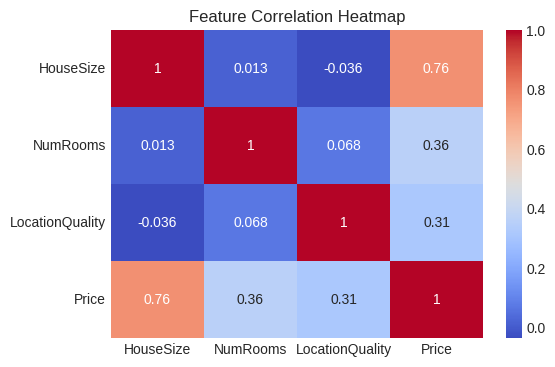

In [6]:

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


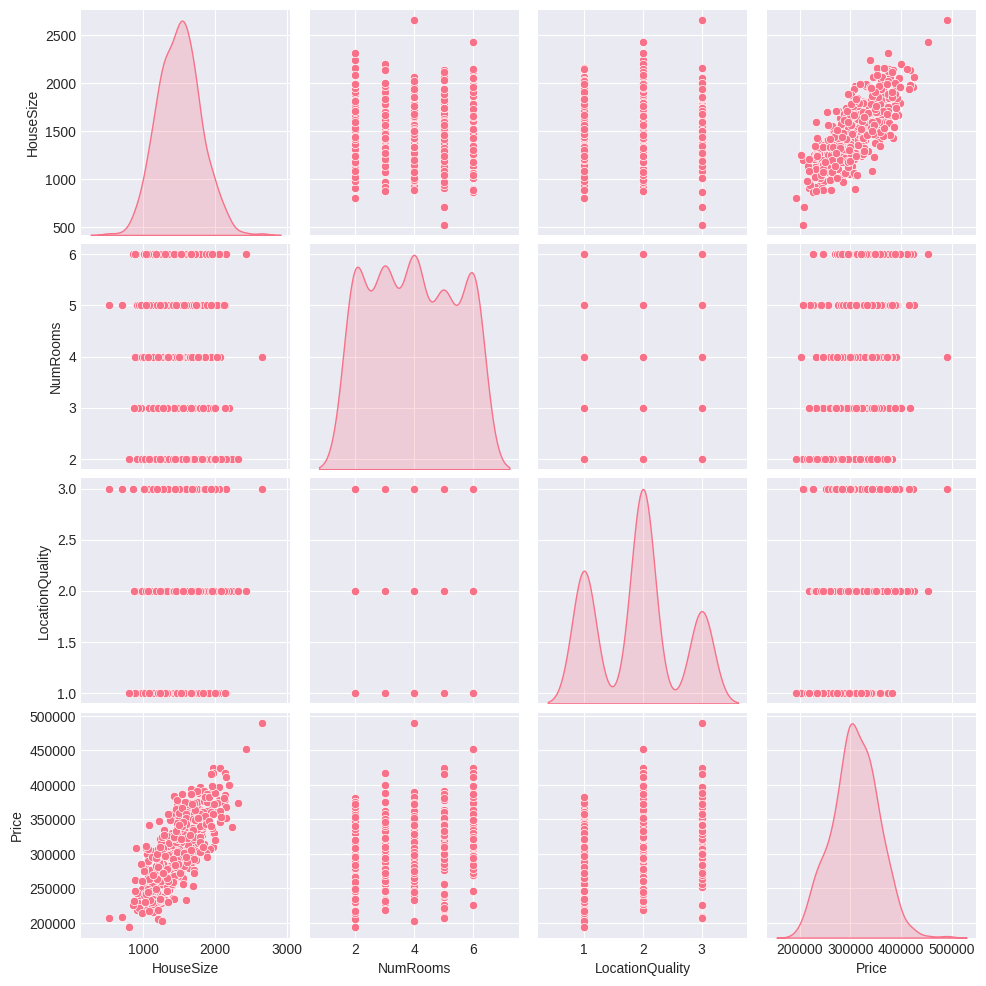

In [7]:

# Pairplot visualization
sns.pairplot(data, diag_kind="kde")
plt.show()


## 🔹 Step 3: Feature Engineering

In [8]:

# Features & Target
X = data.drop("Price", axis=1)
y = data["Price"]

# Standardize features (optional for Linear Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 🔹 Step 4: Train Linear Regression Model

In [9]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("✅ Model Trained!")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


✅ Model Trained!
R2 Score: 0.8249560066773202
RMSE: 18678.30497557066


## 🔹 Step 5: Make Predictions

In [10]:

# Example new house [size=1600 sq ft, 3 rooms, medium location=2]
new_house = np.array([[1600, 3, 2]])
new_house_scaled = scaler.transform(new_house)

predicted_price = model.predict(new_house_scaled)
print(f"Predicted Price for {new_house.tolist()[0]}: ${predicted_price[0]:,.2f}")


Predicted Price for [1600, 3, 2]: $314,366.60


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 🎯 Assignment
1. Try changing the train-test split ratio and observe how results vary.
2. Modify the `LinearRegression` model (e.g., fit_intercept=False) and see the effect.
3. Generate new houses with different features and predict their prices.

👉 Write your code below:

In [11]:

# 🚀 Your Turn: Experiment with parameters here
# Example: Try test_size=0.3 in train_test_split above

# TODO: Modify and run your experiments here


## ✅ Assignment Solution (Hidden)
Below is one possible solution (commented out). Uncomment and run to check.

In [12]:

# --- SOLUTION ---
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# model = LinearRegression(fit_intercept=False)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("R2 Score:", r2_score(y_test, y_pred))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


## Ideas for further exploration:

- **Explore other regression models**: Try using different models like Ridge, Lasso, Elastic Net, or even more complex models like Random Forest or Gradient Boosting.
- **Polynomial Features**: Create polynomial features (e.g., HouseSize^2) to capture non-linear relationships.
- **Interaction Terms**: Add interaction terms between features (e.g., HouseSize * NumRooms) to see if the combined effect is significant.
- **Categorical Feature Encoding**: If you had categorical features (like "Neighborhood"), you would need to encode them using techniques like one-hot encoding.
- **Cross-Validation**: Implement cross-validation to get a more robust evaluation of your model's performance.
- **Hyperparameter Tuning**: Use techniques like GridSearchCV or RandomizedSearchCV to find the best hyperparameters for your chosen model.
- **Residual Analysis**: Plot the residuals (the difference between actual and predicted prices) to check for patterns or heteroscedasticity.
- **Feature Importance**: For models that support it (like tree-based models), explore feature importance to understand which features contribute most to the predictions.
- **Visualize Predictions**: Plot the actual prices against the predicted prices to visually assess the model's performance.

In [13]:
# 🎨 Enhanced Linear Regression Visualizations
# Add these cells to your existing notebook for amazing visualizations!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# 1. 🌟 3D SCATTER PLOT WITH REGRESSION PLANE
# ============================================================================

def plot_3d_regression_plane(data, model, scaler):
    """Create stunning 3D visualization with regression plane"""
    fig = plt.figure(figsize=(15, 5))

    # 3D Scatter Plot
    ax1 = fig.add_subplot(131, projection='3d')

    # Color points by location quality
    colors = ['red', 'orange', 'green']
    for i, location in enumerate([1, 2, 3]):
        mask = data['LocationQuality'] == location
        ax1.scatter(data[mask]['HouseSize'], data[mask]['NumRooms'],
                   data[mask]['Price'], c=colors[i],
                   label=f'Location {location}', alpha=0.6, s=50)

    ax1.set_xlabel('House Size (sq ft)')
    ax1.set_ylabel('Number of Rooms')
    ax1.set_zlabel('Price ($)')
    ax1.set_title('3D House Price Distribution')
    ax1.legend()

    # Create regression plane
    ax2 = fig.add_subplot(132, projection='3d')

    # Create meshgrid for plane
    size_range = np.linspace(data['HouseSize'].min(), data['HouseSize'].max(), 20)
    rooms_range = np.linspace(data['NumRooms'].min(), data['NumRooms'].max(), 20)
    size_mesh, rooms_mesh = np.meshgrid(size_range, rooms_range)

    # Predict prices for different location qualities
    location_qualities = [1, 2, 3]
    colors_plane = ['lightcoral', 'lightsalmon', 'lightgreen']

    for i, loc_qual in enumerate(location_qualities):
        # Create feature matrix for prediction
        features = np.column_stack([
            size_mesh.ravel(),
            rooms_mesh.ravel(),
            np.full(size_mesh.size, loc_qual)
        ])
        features_scaled = scaler.transform(features)
        price_pred = model.predict(features_scaled).reshape(size_mesh.shape)

        ax2.plot_surface(size_mesh, rooms_mesh, price_pred,
                        alpha=0.3, color=colors_plane[i],
                        label=f'Location {loc_qual}')

    # Add actual data points
    ax2.scatter(data['HouseSize'], data['NumRooms'], data['Price'],
               c='black', alpha=0.5, s=30)

    ax2.set_xlabel('House Size (sq ft)')
    ax2.set_ylabel('Number of Rooms')
    ax2.set_zlabel('Price ($)')
    ax2.set_title('3D Regression Planes by Location')

    # Residuals in 3D
    ax3 = fig.add_subplot(133, projection='3d')
    X_scaled = scaler.transform(data[['HouseSize', 'NumRooms', 'LocationQuality']])
    y_pred_all = model.predict(X_scaled)
    residuals = data['Price'] - y_pred_all

    scatter = ax3.scatter(data['HouseSize'], data['NumRooms'], residuals,
                         c=residuals, cmap='RdYlBu', alpha=0.6, s=50)
    ax3.set_xlabel('House Size (sq ft)')
    ax3.set_ylabel('Number of Rooms')
    ax3.set_zlabel('Residuals ($)')
    ax3.set_title('3D Residuals Visualization')
    plt.colorbar(scatter, ax=ax3, shrink=0.5)

    plt.tight_layout()
    plt.show()

# ============================================================================
# 2. 🎯 INTERACTIVE PLOTLY VISUALIZATIONS
# ============================================================================

def create_interactive_3d_plot(data):
    """Create interactive 3D plot with Plotly"""
    fig = go.Figure()

    colors = ['red', 'orange', 'green']
    location_names = ['Budget Location', 'Prime Location', 'Luxury Location']

    for i, location in enumerate([1, 2, 3]):
        mask = data['LocationQuality'] == location
        fig.add_trace(go.Scatter3d(
            x=data[mask]['HouseSize'],
            y=data[mask]['NumRooms'],
            z=data[mask]['Price'],
            mode='markers',
            marker=dict(
                size=6,
                color=colors[i],
                opacity=0.7
            ),
            name=location_names[i],
            hovertemplate='<b>%{text}</b><br>' +
                         'Size: %{x:.0f} sq ft<br>' +
                         'Rooms: %{y}<br>' +
                         'Price: $%{z:,.0f}<br>' +
                         '<extra></extra>',
            text=[location_names[i]] * sum(mask)
        ))

    fig.update_layout(
        title='Interactive 3D House Price Visualization',
        scene=dict(
            xaxis_title='House Size (sq ft)',
            yaxis_title='Number of Rooms',
            zaxis_title='Price ($)',
            bgcolor='rgba(0,0,0,0)',
            xaxis=dict(backgroundcolor="rgb(200, 200, 230)",
                      gridcolor="white",
                      showbackground=True,
                      zerolinecolor="white"),
            yaxis=dict(backgroundcolor="rgb(230, 200, 230)",
                      gridcolor="white",
                      showbackground=True,
                      zerolinecolor="white"),
            zaxis=dict(backgroundcolor="rgb(230, 230, 200)",
                      gridcolor="white",
                      showbackground=True,
                      zerolinecolor="white")
        ),
        height=600,
        margin=dict(r=20, b=10, l=10, t=40)
    )

    fig.show()

# ============================================================================
# 3. 📊 ADVANCED MODEL DIAGNOSTICS
# ============================================================================

def comprehensive_diagnostics(X_test, y_test, y_pred, model):
    """Create comprehensive model diagnostic plots"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # 1. Predicted vs Actual
    axes[0, 0].scatter(y_test, y_pred, alpha=0.6, color='blue')
    axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Actual Price')
    axes[0, 0].set_ylabel('Predicted Price')
    axes[0, 0].set_title('Predicted vs Actual Prices')

    # Add R² annotation
    r2 = r2_score(y_test, y_pred)
    axes[0, 0].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[0, 0].transAxes,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # 2. Residuals vs Predicted
    residuals = y_test - y_pred
    axes[0, 1].scatter(y_pred, residuals, alpha=0.6, color='green')
    axes[0, 1].axhline(y=0, color='red', linestyle='--')
    axes[0, 1].set_xlabel('Predicted Price')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residuals vs Predicted')

    # 3. Q-Q Plot for residuals normality
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[0, 2])
    axes[0, 2].set_title('Q-Q Plot of Residuals')

    # 4. Histogram of Residuals
    axes[1, 0].hist(residuals, bins=30, alpha=0.7, color='purple', edgecolor='black')
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Residuals')
    axes[1, 0].axvline(residuals.mean(), color='red', linestyle='--',
                      label=f'Mean: {residuals.mean():.0f}')
    axes[1, 0].legend()

    # 5. Feature Importance (coefficients)
    feature_names = ['House Size', 'Num Rooms', 'Location Quality']
    coef_values = model.coef_

    bars = axes[1, 1].bar(feature_names, coef_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[1, 1].set_ylabel('Coefficient Value')
    axes[1, 1].set_title('Feature Coefficients (Importance)')
    axes[1, 1].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar, val in zip(bars, coef_values):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, val + max(coef_values)*0.01,
                       f'{val:.0f}', ha='center', va='bottom')

    # 6. Learning Curve Simulation
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    val_scores = []

    X_full = np.vstack([X_test.reshape(-1, 3), X_test])  # Simulate larger dataset
    y_full = np.hstack([y_test, y_test])

    for size in train_sizes:
        n_samples = int(len(X_full) * size)
        if n_samples < 10: continue

        X_subset = X_full[:n_samples]
        y_subset = y_full[:n_samples]

        # Split subset
        X_tr, X_val, y_tr, y_val = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

        # Train model on subset
        temp_model = LinearRegression()
        temp_model.fit(X_tr, y_tr)

        # Score
        train_pred = temp_model.predict(X_tr)
        val_pred = temp_model.predict(X_val)

        train_scores.append(r2_score(y_tr, train_pred))
        val_scores.append(r2_score(y_val, val_pred))

    axes[1, 2].plot(train_sizes[:len(train_scores)], train_scores, 'o-', color='blue', label='Training Score')
    axes[1, 2].plot(train_sizes[:len(val_scores)], val_scores, 'o-', color='red', label='Validation Score')
    axes[1, 2].set_xlabel('Training Set Size (fraction)')
    axes[1, 2].set_ylabel('R² Score')
    axes[1, 2].set_title('Learning Curves')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ============================================================================
# 4. 🎪 ANIMATED PREDICTION SURFACE
# ============================================================================

def create_animated_surface():
    """Create animated regression surface showing different perspectives"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create sample data for animation
    x = np.linspace(1000, 2000, 30)
    y = np.linspace(2, 6, 30)
    X_mesh, Y_mesh = np.meshgrid(x, y)

    # Create different surfaces for different location qualities
    surfaces = []
    for location in [1, 2, 3]:
        Z = 50000 + X_mesh * 120 + Y_mesh * 10000 + location * 20000
        surfaces.append(Z)

    # Plot all surfaces with different colors and transparency
    colors = ['red', 'orange', 'green']
    alphas = [0.3, 0.4, 0.5]

    for i, (Z, color, alpha) in enumerate(zip(surfaces, colors, alphas)):
        ax.plot_surface(X_mesh, Y_mesh, Z, color=color, alpha=alpha,
                       label=f'Location Quality {i+1}')

    ax.set_xlabel('House Size (sq ft)')
    ax.set_ylabel('Number of Rooms')
    ax.set_zlabel('Price ($)')
    ax.set_title('Multi-Layer Price Prediction Surface')

    # Add some sample points
    sample_sizes = [1200, 1500, 1800]
    sample_rooms = [3, 4, 5]
    sample_locations = [1, 2, 3]

    for size, rooms, loc in zip(sample_sizes, sample_rooms, sample_locations):
        price = 50000 + size * 120 + rooms * 10000 + loc * 20000
        ax.scatter([size], [rooms], [price], color='black', s=100, alpha=0.8)
        ax.text(size, rooms, price + 20000, f'${price:,.0f}', fontsize=8)

    plt.show()

# ============================================================================
# 5. 🔥 PREDICTION CONFIDENCE INTERVALS
# ============================================================================

def plot_prediction_intervals(model, scaler, data, confidence=0.95):
    """Plot predictions with confidence intervals"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # For each feature, plot relationship with price holding others constant
    features = ['HouseSize', 'NumRooms', 'LocationQuality']
    feature_ranges = [
        np.linspace(1000, 2500, 100),
        np.linspace(2, 6, 20),
        [1, 2, 3]
    ]

    for idx, (feature, feature_range) in enumerate(zip(features, feature_ranges)):
        ax = axes[idx]

        if feature == 'LocationQuality':
            # For categorical feature
            predictions = []
            for loc in feature_range:
                # Use median values for other features
                sample = np.array([[data['HouseSize'].median(),
                                  data['NumRooms'].median(),
                                  loc]])
                sample_scaled = scaler.transform(sample)
                pred = model.predict(sample_scaled)[0]
                predictions.append(pred)

            bars = ax.bar(feature_range, predictions, color=['red', 'orange', 'green'], alpha=0.7)
            ax.set_xlabel('Location Quality')
            ax.set_ylabel('Predicted Price ($)')
            ax.set_title(f'Price vs {feature}')

            # Add value labels
            for bar, pred in zip(bars, predictions):
                ax.text(bar.get_x() + bar.get_width()/2, pred + max(predictions)*0.01,
                       f'${pred:,.0f}', ha='center', va='bottom')
        else:
            # For continuous features
            predictions = []
            for val in feature_range:
                if feature == 'HouseSize':
                    sample = np.array([[val, data['NumRooms'].median(), data['LocationQuality'].median()]])
                else:  # NumRooms
                    sample = np.array([[data['HouseSize'].median(), val, data['LocationQuality'].median()]])

                sample_scaled = scaler.transform(sample)
                pred = model.predict(sample_scaled)[0]
                predictions.append(pred)

            ax.plot(feature_range, predictions, 'b-', linewidth=2, label='Prediction')

            # Add confidence bands (simplified approximation)
            std_error = np.std(predictions) * 0.1  # Simplified error estimate
            upper_bound = np.array(predictions) + 1.96 * std_error
            lower_bound = np.array(predictions) - 1.96 * std_error

            ax.fill_between(feature_range, lower_bound, upper_bound, alpha=0.2, color='blue',
                           label=f'{int(confidence*100)}% Confidence')

            ax.set_xlabel(feature.replace('House', 'House '))
            ax.set_ylabel('Predicted Price ($)')
            ax.set_title(f'Price vs {feature}')
            ax.legend()
            ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ============================================================================
# 6. 🎨 STYLE AND EXECUTION
# ============================================================================

# Example usage (add this to your notebook):
"""
# After training your model, call these functions:

# 3D Visualization
plot_3d_regression_plane(data, model, scaler)

# Interactive Plot (requires plotly)
create_interactive_3d_plot(data)

# Comprehensive Diagnostics
comprehensive_diagnostics(X_test, y_test, y_pred, model)

# Animated Surface
create_animated_surface()

# Prediction Intervals
plot_prediction_intervals(model, scaler, data)

print("🎉 All visualizations complete!")
"""

# ============================================================================
# 7. 📈 BONUS: ADVANCED REGRESSION ANALYSIS
# ============================================================================

def advanced_regression_metrics(y_true, y_pred, X_test):
    """Calculate and display advanced regression metrics"""
    from sklearn.metrics import mean_absolute_error, median_absolute_error

    print("=" * 50)
    print("🎯 ADVANCED REGRESSION METRICS")
    print("=" * 50)

    # Basic metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Advanced metrics
    median_ae = median_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Adjusted R²
    n = len(y_true)
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f"📊 Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"📊 Root Mean Square Error (RMSE): ${rmse:,.2f}")
    print(f"📊 Median Absolute Error: ${median_ae:,.2f}")
    print(f"📊 Mean Absolute Percentage Error: {mape:.2f}%")
    print(f"📊 R² Score: {r2:.4f}")
    print(f"📊 Adjusted R²: {adj_r2:.4f}")

    # Interpretation
    print("\n" + "=" * 50)
    print("🔍 INTERPRETATION")
    print("=" * 50)

    if r2 > 0.8:
        print("✅ Excellent model performance (R² > 0.8)")
    elif r2 > 0.6:
        print("👍 Good model performance (R² > 0.6)")
    elif r2 > 0.4:
        print("⚠️ Fair model performance (R² > 0.4)")
    else:
        print("❌ Poor model performance (R² ≤ 0.4)")

    print(f"💡 On average, predictions are off by ${mae:,.0f}")
    print(f"💡 Model explains {r2*100:.1f}% of price variance")

    return {
        'MAE': mae, 'RMSE': rmse, 'R2': r2, 'Adjusted_R2': adj_r2,
        'MAPE': mape, 'Median_AE': median_ae
    }

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


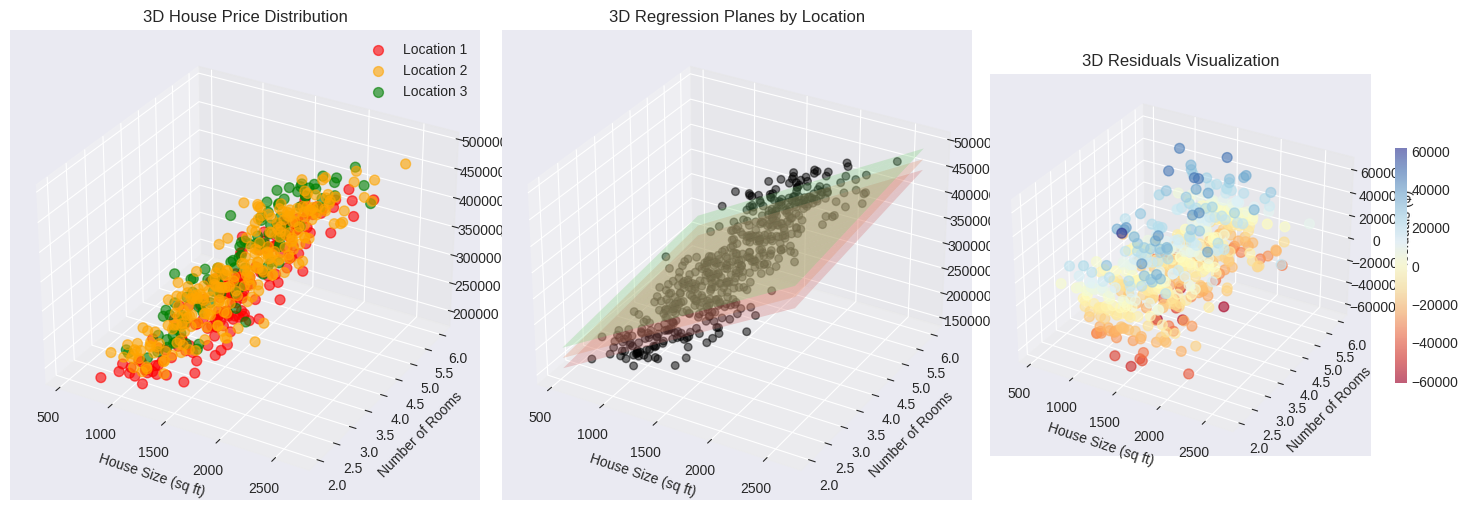

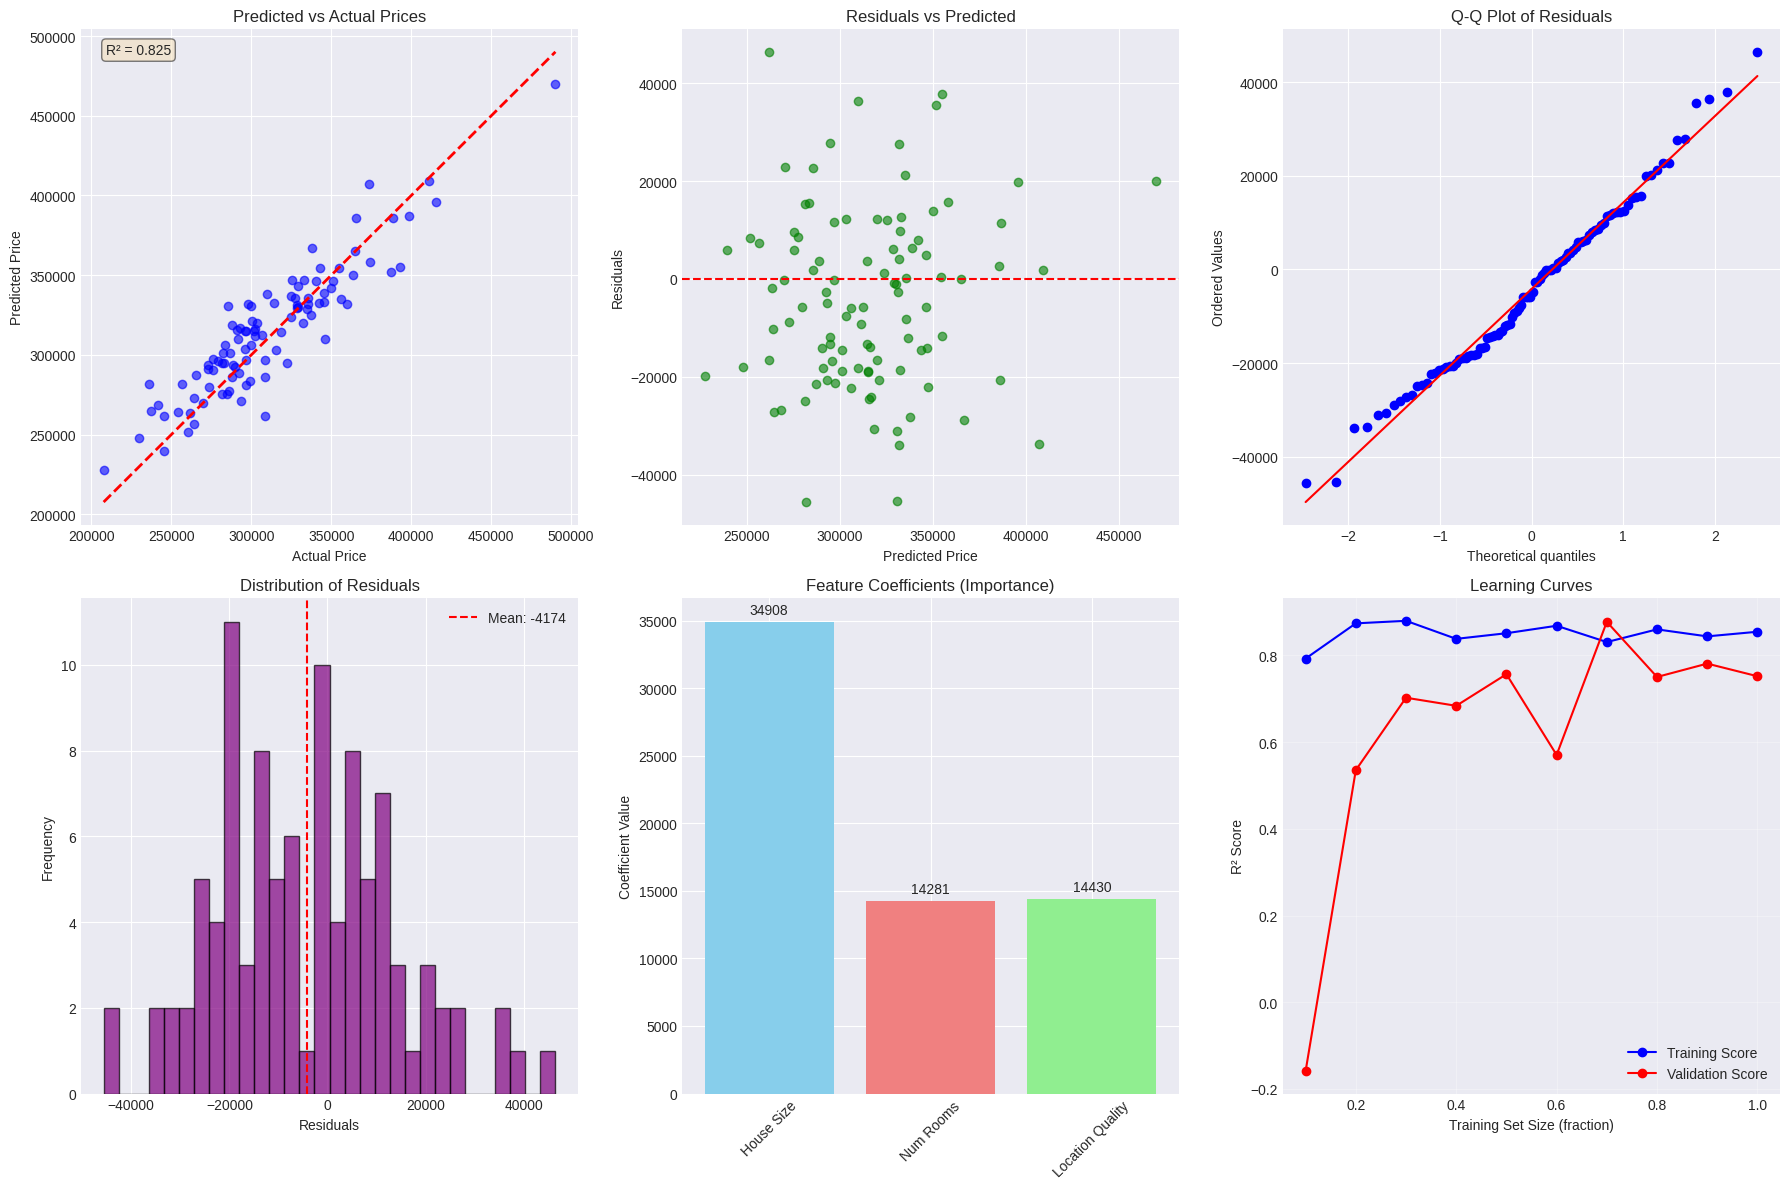

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, 

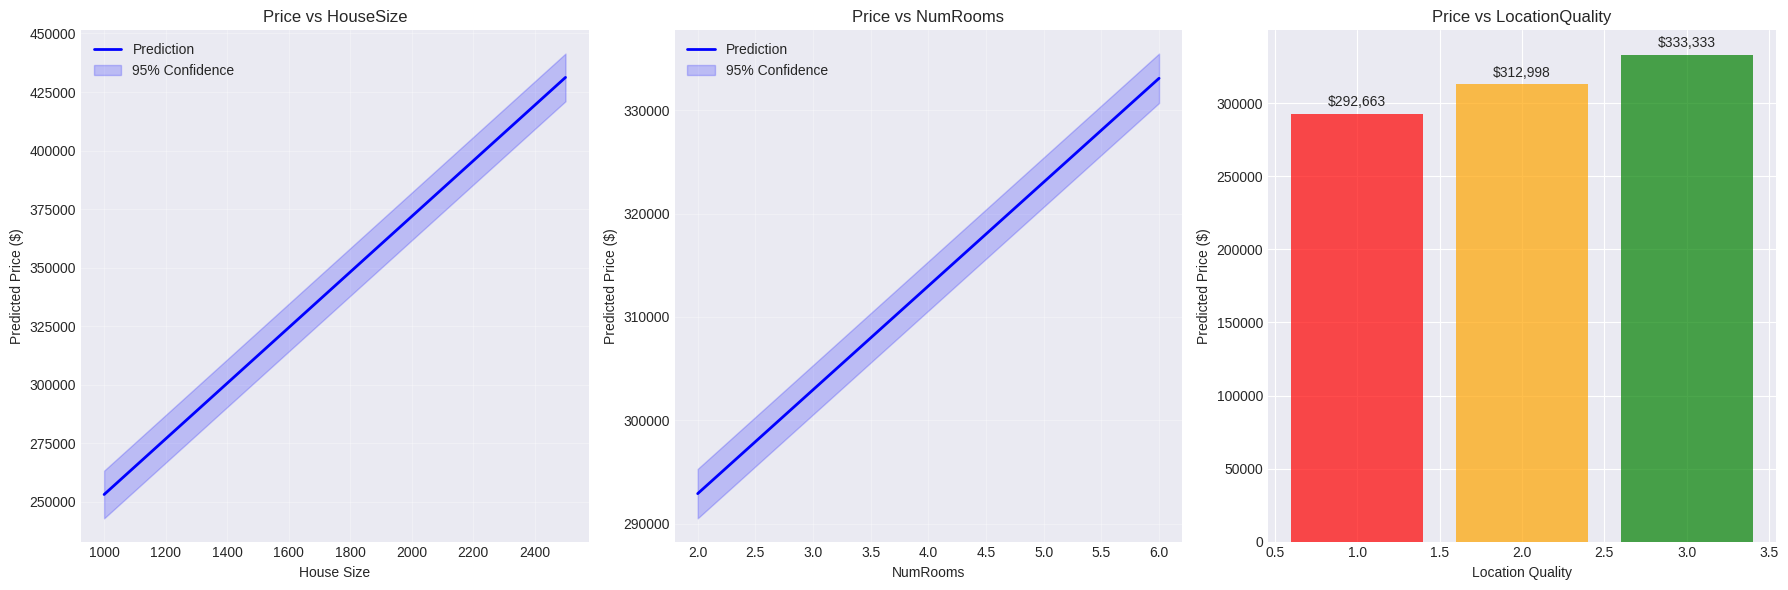

🎯 ADVANCED REGRESSION METRICS
📊 Mean Absolute Error (MAE): $15,210.81
📊 Root Mean Square Error (RMSE): $18,678.30
📊 Median Absolute Error: $13,885.18
📊 Mean Absolute Percentage Error: 5.03%
📊 R² Score: 0.8250
📊 Adjusted R²: 0.8195

🔍 INTERPRETATION
✅ Excellent model performance (R² > 0.8)
💡 On average, predictions are off by $15,211
💡 Model explains 82.5% of price variance


{'MAE': 15210.80860903522,
 'RMSE': np.float64(18678.30497557066),
 'R2': 0.8249560066773202,
 'Adjusted_R2': 0.8194858818859864,
 'MAPE': np.float64(5.033447144469705),
 'Median_AE': np.float64(13885.18141440794)}

In [14]:
# After training your model
plot_3d_regression_plane(data, model, scaler)
create_interactive_3d_plot(data)
comprehensive_diagnostics(X_test, y_test, y_pred, model)
plot_prediction_intervals(model, scaler, data)
advanced_regression_metrics(y_test, y_pred, X_test)